# Restaurant Order Analyse

1.受欢迎菜品
2.菜品平均价格
3.哪个订单菜最多

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#set Chinese
plt.rcParams['font.sans-serif'] = 'SimHei'

#import data
data1 = pd.read_excel('.\Data\meal_order_detail.xlsx',sheet_name = 'meal_order_detail1')
data2 = pd.read_excel('.\Data\meal_order_detail.xlsx',sheet_name = 'meal_order_detail2')
data3 = pd.read_excel('.\Data\meal_order_detail.xlsx',sheet_name = 'meal_order_detail3')

#merge data as row contact
data = pd.concat([data1,data2,data3],axis = 0)
data.dropna(axis=1,inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


Dish average price in August

In [4]:
import numpy as np

#averge price for the dish
round(data['amounts'].mean(),2)
#numpy is better for the large data
round(np.mean(data['amounts']),2)

44.82

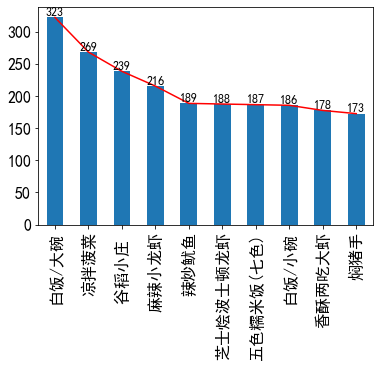

In [5]:
#freq calculate,which dish is popular

dishes_count = data['dishes_name'].value_counts()[:10]
top_10 =dishes_count

#visualize
dishes_count.plot(kind='line',color =['r'])
dishes_count.plot(kind='bar',fontsize = 16)
for x,y in enumerate(dishes_count):
    plt.text(x,y+2,y,ha ='center',fontsize = 12)

Text(0, 0.5, 'OrderType')

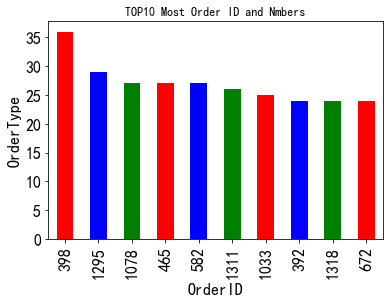

In [6]:
#which order has most dishes
data_group=data['order_id'].value_counts()[:10]
data_group.plot(kind = 'bar',fontsize = 16,color=['r','b','g'])
plt.title('TOP10 Most Order ID and Nmbers')
plt.xlabel('OrderID',fontsize =16)
plt.ylabel('OrderType',fontsize = 16)

#August Order Top10 and Average dishes is 25

Text(0.5, 1.0, 'OrderID Order Most Dishes Top 10')

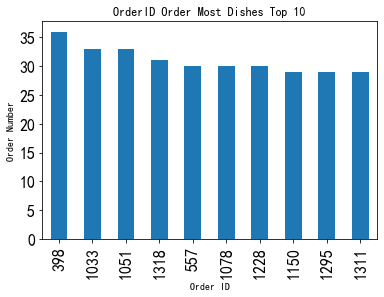

In [7]:
#order number
data['total_amounts'] = data['counts']*data['amounts']
dataGroup = data[['order_id','counts','amounts','total_amounts']].groupby(by = 'order_id')
Group_sum = dataGroup.sum()
sort_counts = Group_sum.sort_values(by = 'counts',ascending = False)
sort_counts['counts'][:10].plot(kind = 'bar',fontsize = 16)
plt.xlabel('Order ID')
plt.ylabel('Order Number')
plt.title('OrderID Order Most Dishes Top 10')


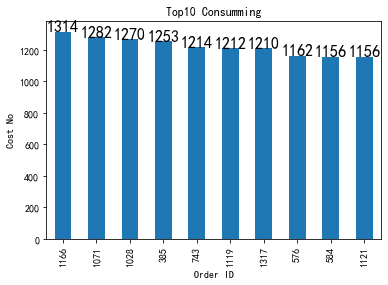

In [8]:
sort_total_amounts = Group_sum.sort_values(by = 'total_amounts',ascending =False)
top10_data=sort_total_amounts['total_amounts'][:10]
sort_total_amounts['total_amounts'][:10].plot(kind = 'bar')
plt.xlabel('Order ID')
plt.ylabel('Cost No')
plt.title('Top10 Consumming')

# 添加数字标签
for i, v in enumerate(top10_data):
    plt.text(i, v+0.5, str(v), color='black', fontweight='bold', ha='center',fontsize=16)

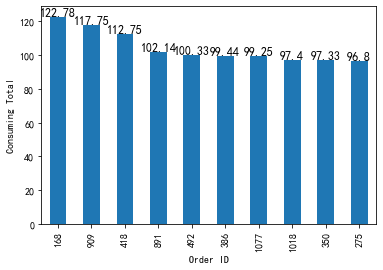

In [9]:
#Which order has most expensive consuming
Group_sum['average'] = round(Group_sum['total_amounts']/Group_sum['counts'],2)
sort_average =Group_sum.sort_values(by = 'average',ascending = False)
sort_average['average'][:10].plot(kind = 'bar')
plt.xlabel('Order ID')
plt.ylabel('Consuming Total')
for i, v in enumerate(sort_average['average'][:10]):
    plt.text(i, v+0.5, str(v), color='black', fontweight='bold', ha='center',fontsize=12)

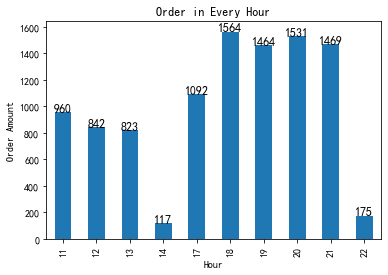

In [16]:
# Whih time period has more order
data['hourcount'] = 1
data['time'] = pd.to_datetime(data['place_order_time'])
data['hour'] = data['time'].map(lambda x:x.hour)
group_by_hour = data.groupby(by = 'hour').count()['hourcount']
group_by_hour.plot(kind = 'bar')
plt.xlabel('Hour')
plt.ylabel('Order Amount')
plt.title('Order in Every Hour')
for i, v in enumerate(group_by_hour):
    plt.text(i, v+0.5, str(v), color='black', fontweight='bold', ha='center',fontsize=12)


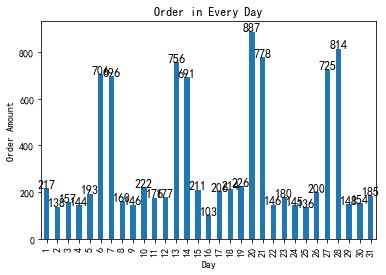

In [32]:
data['day'] = data['time'].map(lambda x:x.day)
group_by_day = data.groupby(by = 'day').count()['daycount']
group_by_day.plot(kind = 'bar')
plt.xlabel('Day')
plt.ylabel('Order Amount')
plt.title('Order in Every Day')

for i, v in enumerate(group_by_day):
    plt.text(i, v+0.5, str(v), color='black', fontweight='bold', ha='center',fontsize=12)


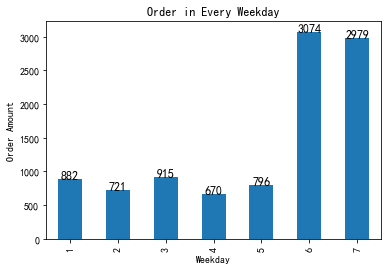

In [39]:
data['weekcount'] = 1
data['weekday'] = data['time'].map(lambda x:x.weekday()+1)
group_by_weekday = data.groupby(by = 'weekday').count()['weekcount']
group_by_weekday.plot(kind = 'bar')
plt.xlabel('Weekday')
plt.ylabel('Order Amount')
plt.title('Order in Every Weekday')
for i, v in enumerate(group_by_weekday):
    plt.text(i, v+0.5, str(v), color='black', fontweight='bold', ha='center',fontsize=12)
